In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from math import sqrt

data = pd.read_csv('RFLFSODataFull.csv')  

synop_code_mapping = {
    0: 'clear',
    3: 'dust storm',
    4: 'fog',
    5: 'drizzle',
    6: 'rain',
    7: 'snow',
    8: 'showers'
}

columns = data.columns.tolist()



In [ ]:

def split_data_by_synop_code(data, synop_code_col='SYNOPCode'):
    subsets = {}
    unique_codes = data[synop_code_col].unique()
    for code in unique_codes:
        subset = data[data[synop_code_col] == code]
        weather_type = synop_code_mapping.get(code, f"Unknown ({code})")
        subsets[weather_type] = subset
        print(f"Weather Condition: {weather_type}, Observations: {len(subset)}")
    return subsets

In [ ]:

def feature_removal_analysis(X, y, model, title):
    model.fit(X, y)
    importances = model.feature_importances_
    features = np.array(X.columns)
    sorted_idx = np.argsort(importances)[::-1]  
    sorted_features = features[sorted_idx]
    sorted_importances = importances[sorted_idx]

    rmse_scores, r2_scores = [], []
    for i in range(len(sorted_features), 1, -1):
        selected_features = sorted_features[:i]
        model.fit(X[selected_features], y)
        y_pred = model.predict(X[selected_features])
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        r2 = r2_score(y, y_pred)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

   
    fig, ax1 = plt.subplots(figsize=(12, 7))


    ax1.set_ylabel('RMSE (dB)', color='steelblue', fontsize=12)
    rmse_line, = ax1.plot(range(len(rmse_scores)), rmse_scores, color='steelblue', marker='o', linewidth=2, label='RMSE (dB)')
    ax1.tick_params(axis='y', labelcolor='steelblue', labelsize=10)
    ax1.tick_params(axis='x', labelsize=10)
    ax1.grid(visible=True, linestyle='-', alpha=0.7)

    ax2 = ax1.twinx()
    ax2.set_ylabel('R²', color='darkorange', fontsize=12, labelpad=10)
    r2_line, = ax2.plot(range(len(r2_scores)), r2_scores, color='darkorange', marker='s', linestyle='-', linewidth=2, label='R²')
    ax2.tick_params(axis='y', labelcolor='darkorange', labelsize=10)
   

    ax1.set_xticks(range(len(sorted_features)))
    ax1.set_xticklabels(sorted_features[::-1], rotation=45, fontsize=10, ha='right')

    fig.legend(handles=[rmse_line, r2_line], loc='upper center', ncol=2, fontsize=10, frameon=False, bbox_to_anchor=(0.5, 1.05))
    plt.title(title, fontsize=14, pad=15)
    plt.tight_layout()
    plt.show()

    return sorted_features, rmse_scores, r2_scores


Weather Condition: clear, Observations: 56964
Weather Condition: rain, Observations: 25018
Weather Condition: showers, Observations: 1716
Weather Condition: drizzle, Observations: 6605
Weather Condition: dust storm, Observations: 191
Weather Condition: fog, Observations: 466
Weather Condition: snow, Observations: 419
Analyzing Weather Condition: clear
FSO Analysis for Weather Condition: clear


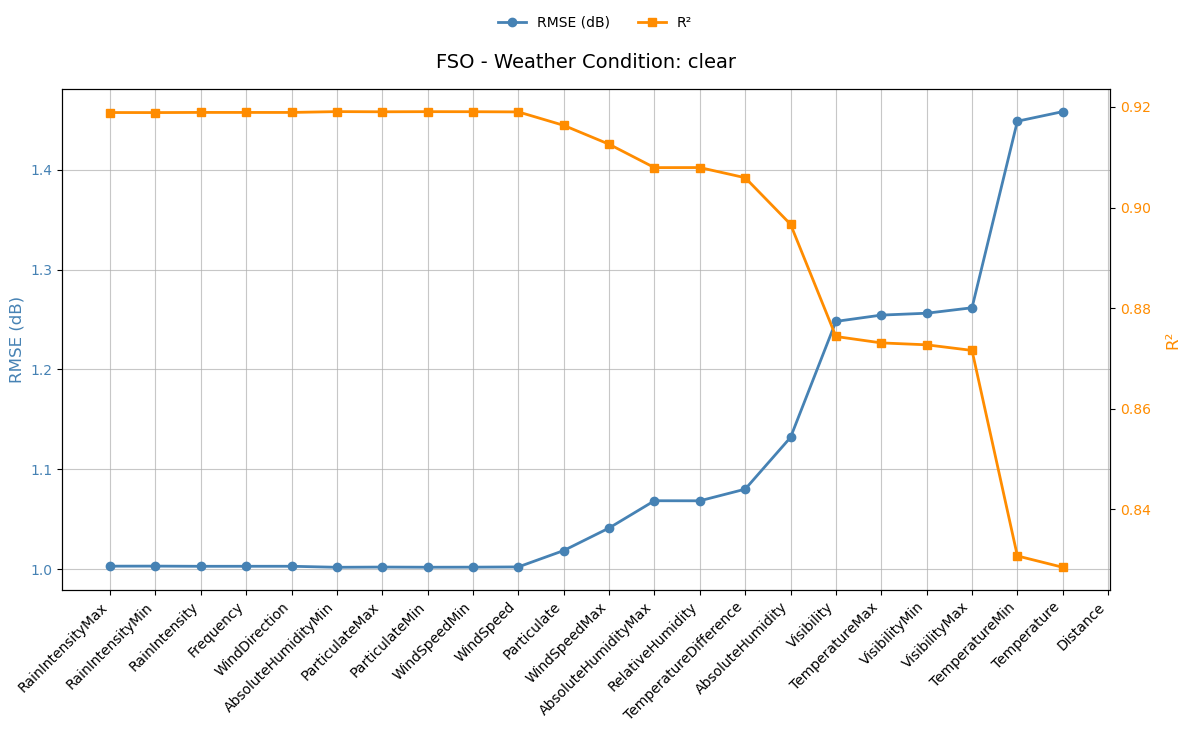

RFL Analysis for Weather Condition: clear


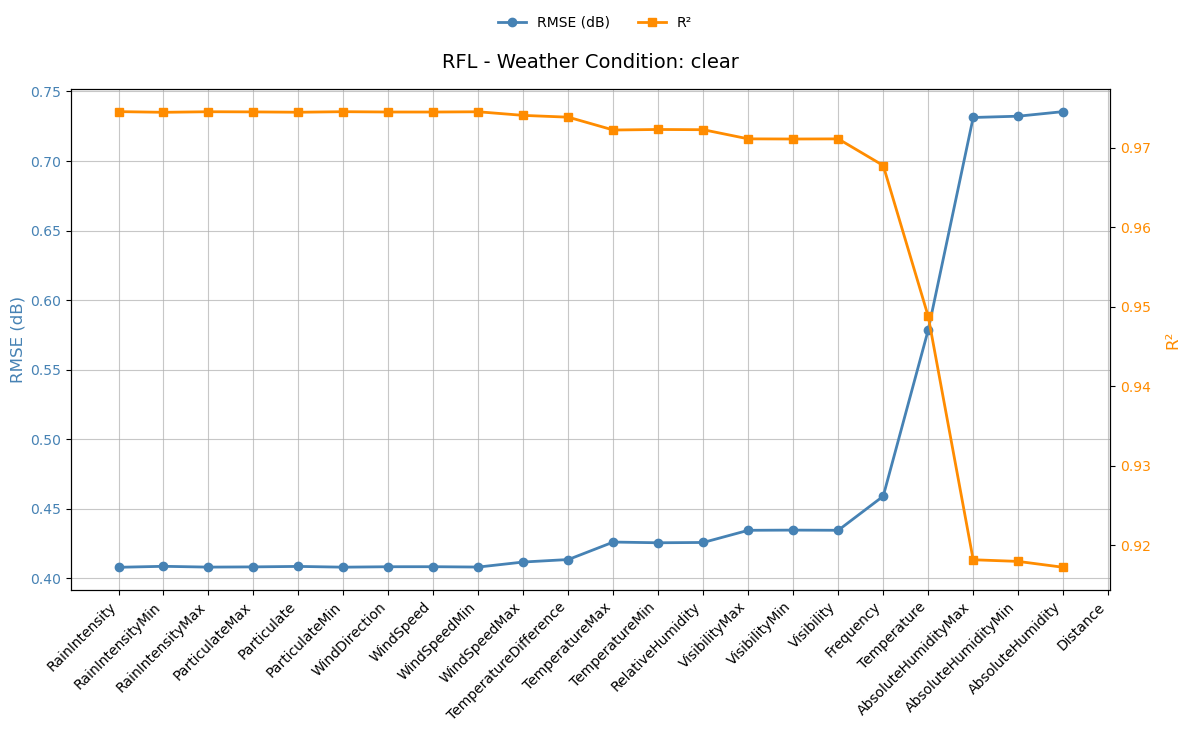

Analyzing Weather Condition: rain
FSO Analysis for Weather Condition: rain


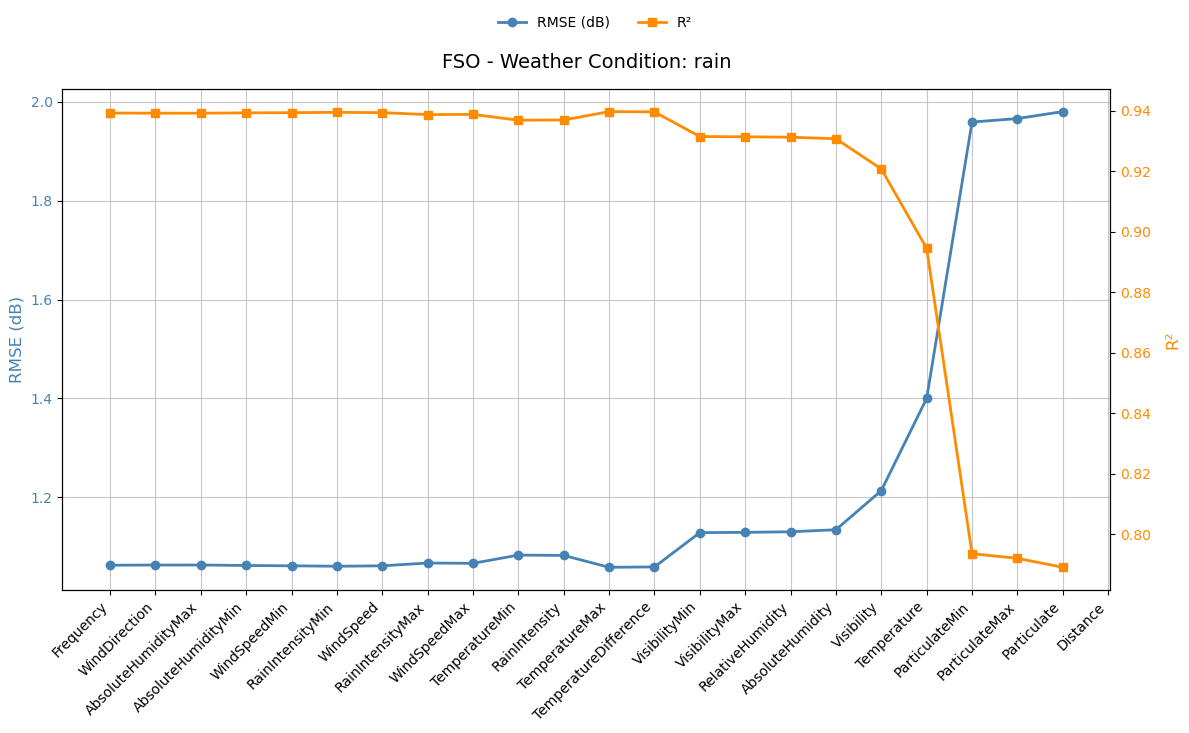

RFL Analysis for Weather Condition: rain


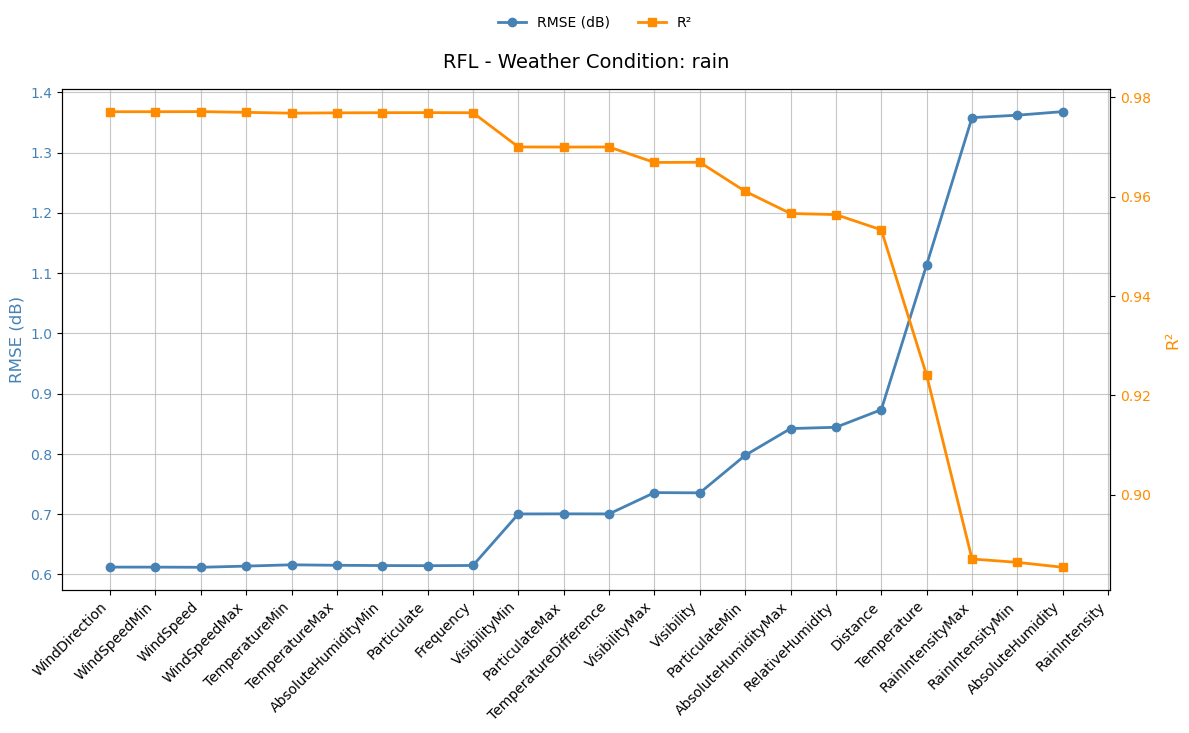

Analyzing Weather Condition: showers
FSO Analysis for Weather Condition: showers


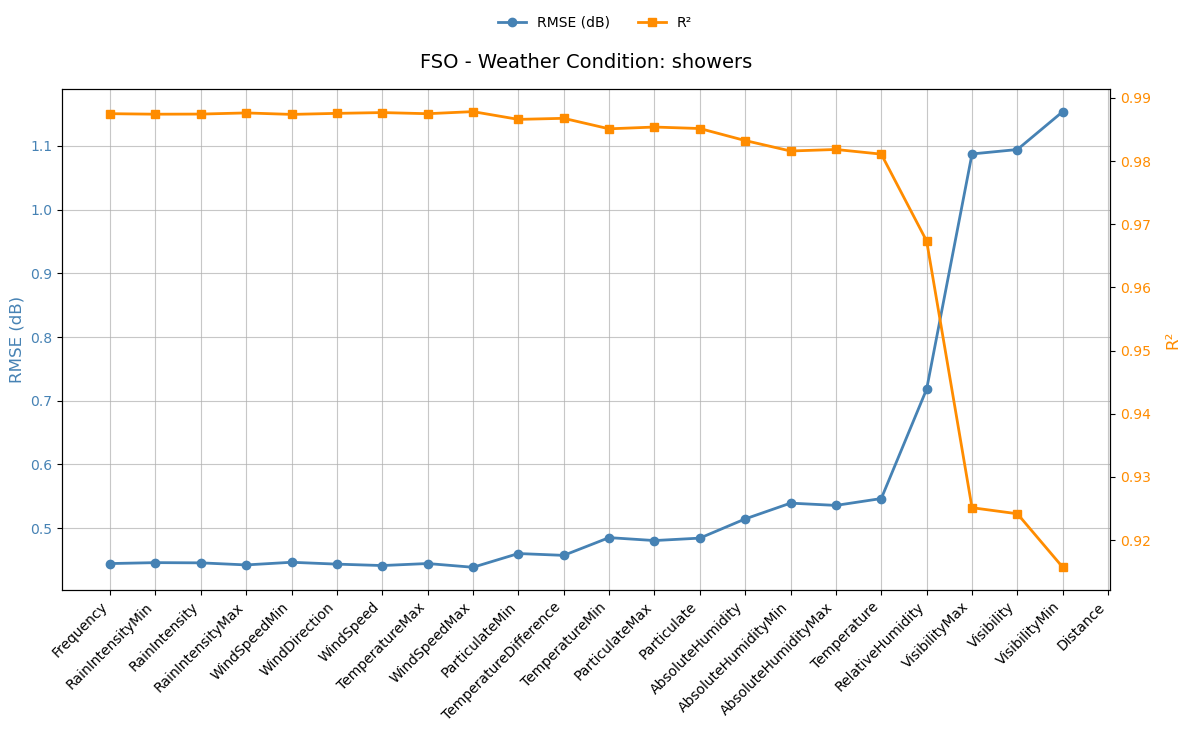

RFL Analysis for Weather Condition: showers


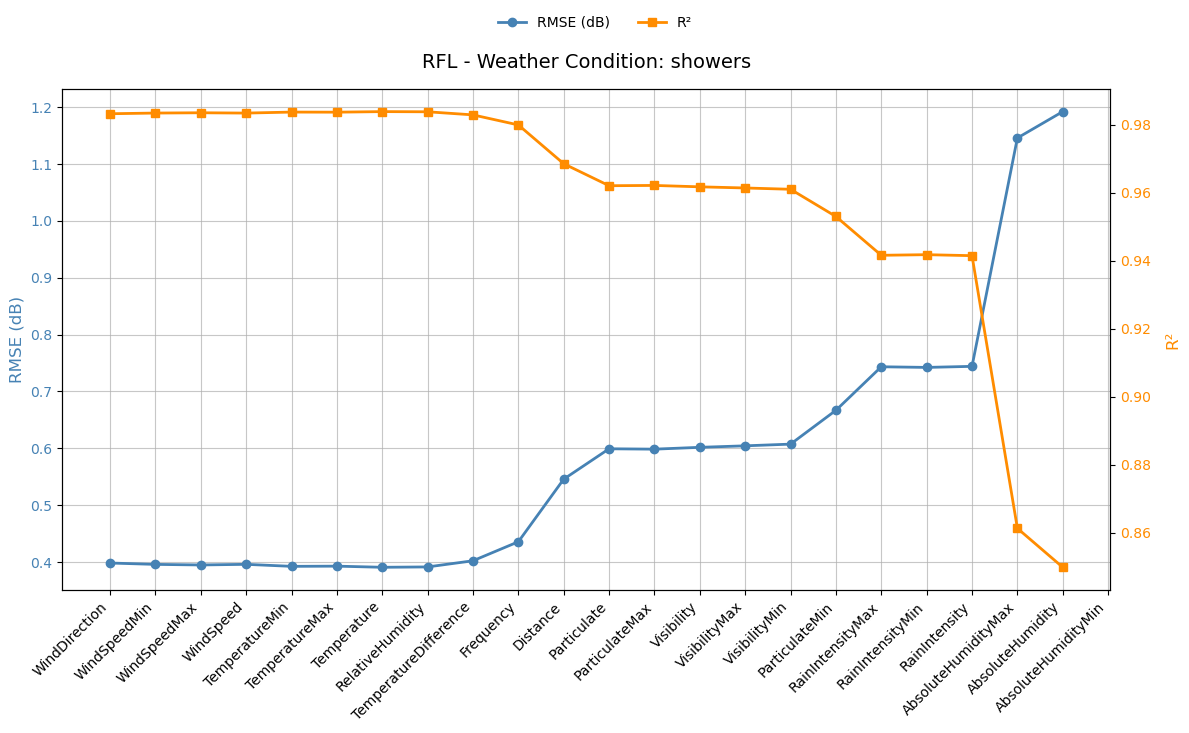

Analyzing Weather Condition: drizzle
FSO Analysis for Weather Condition: drizzle


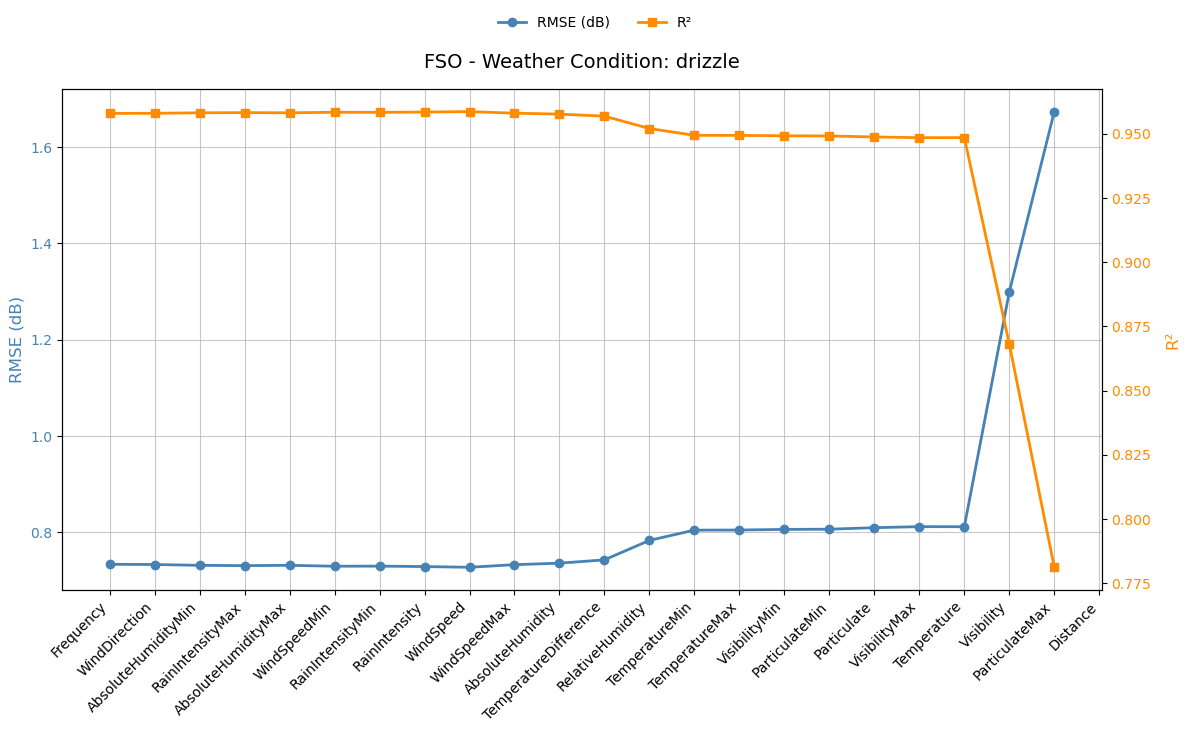

RFL Analysis for Weather Condition: drizzle


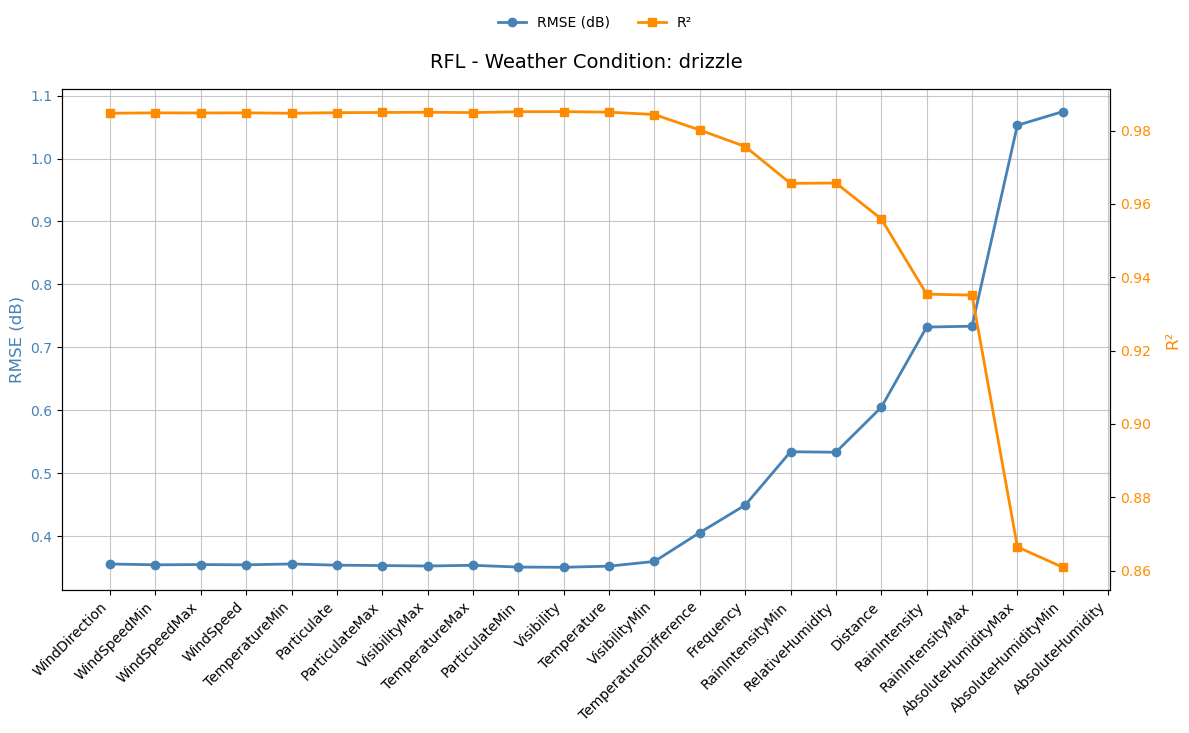

Analyzing Weather Condition: dust storm
FSO Analysis for Weather Condition: dust storm


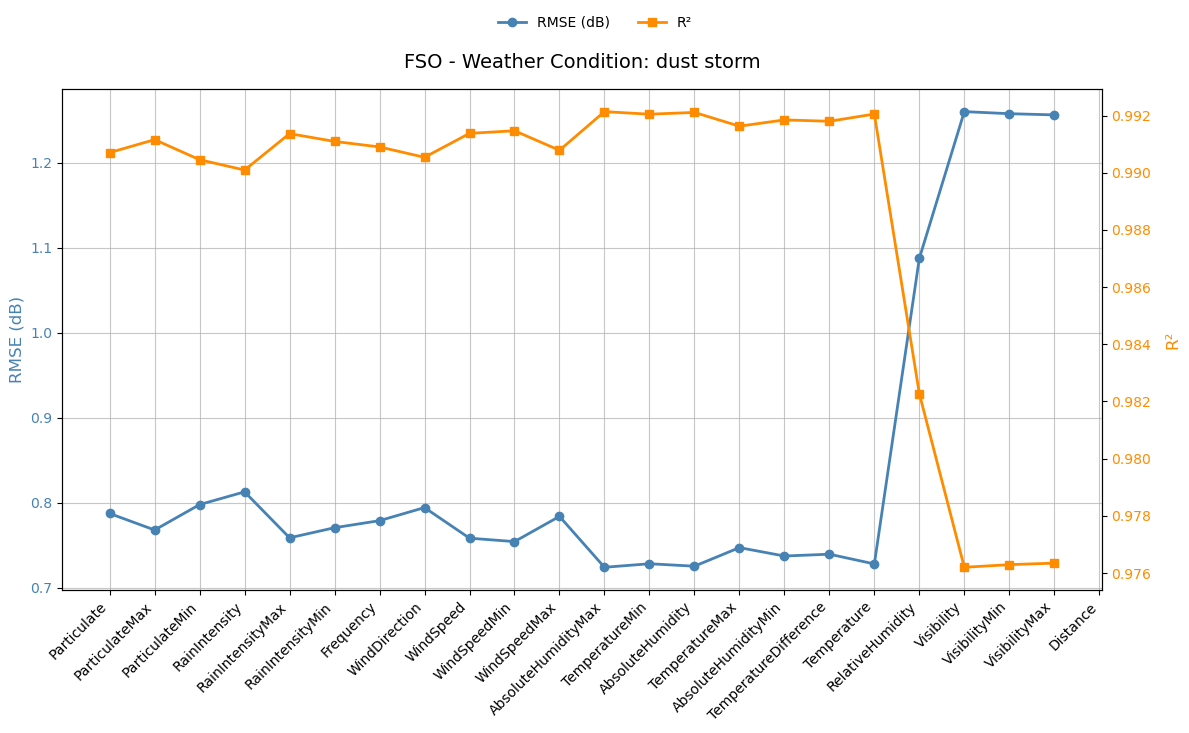

RFL Analysis for Weather Condition: dust storm


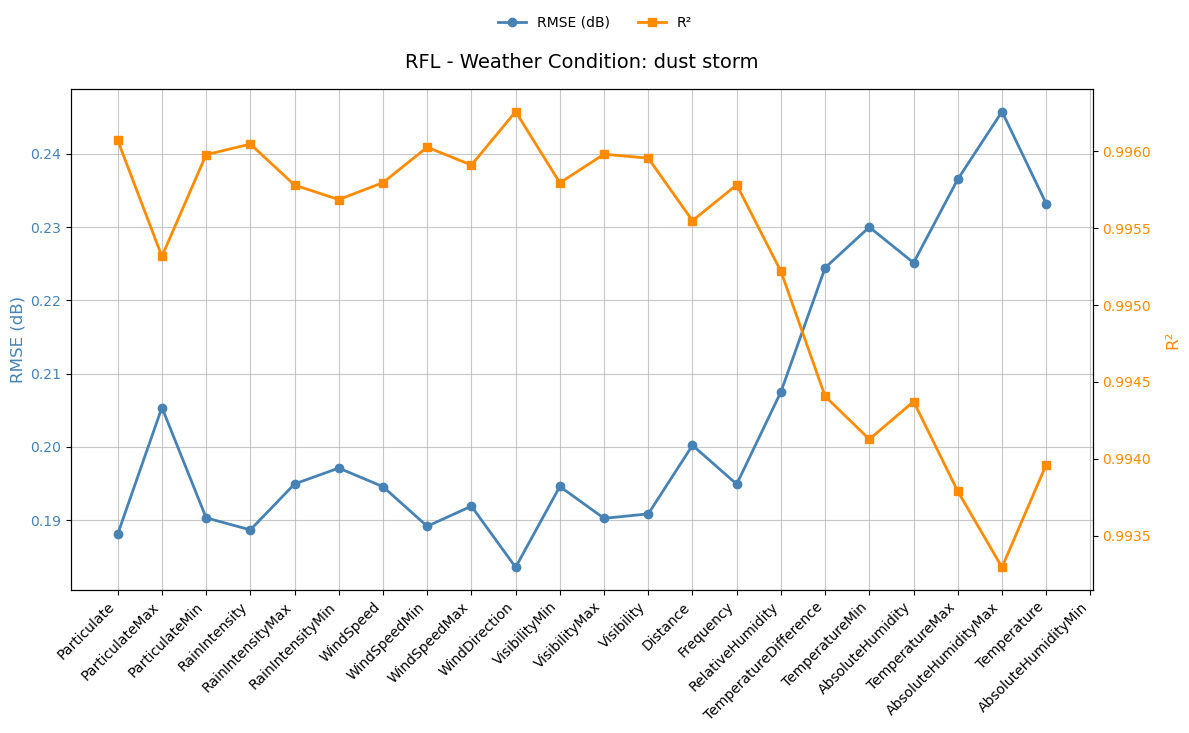

Analyzing Weather Condition: fog
FSO Analysis for Weather Condition: fog


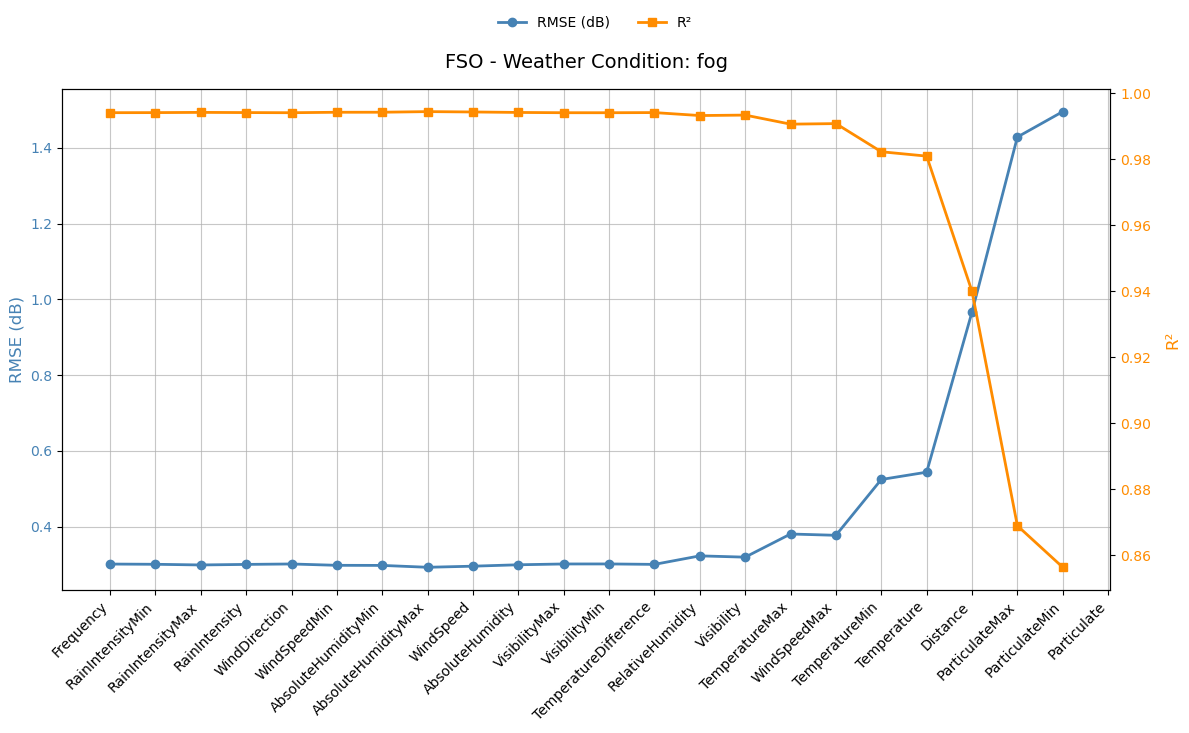

RFL Analysis for Weather Condition: fog


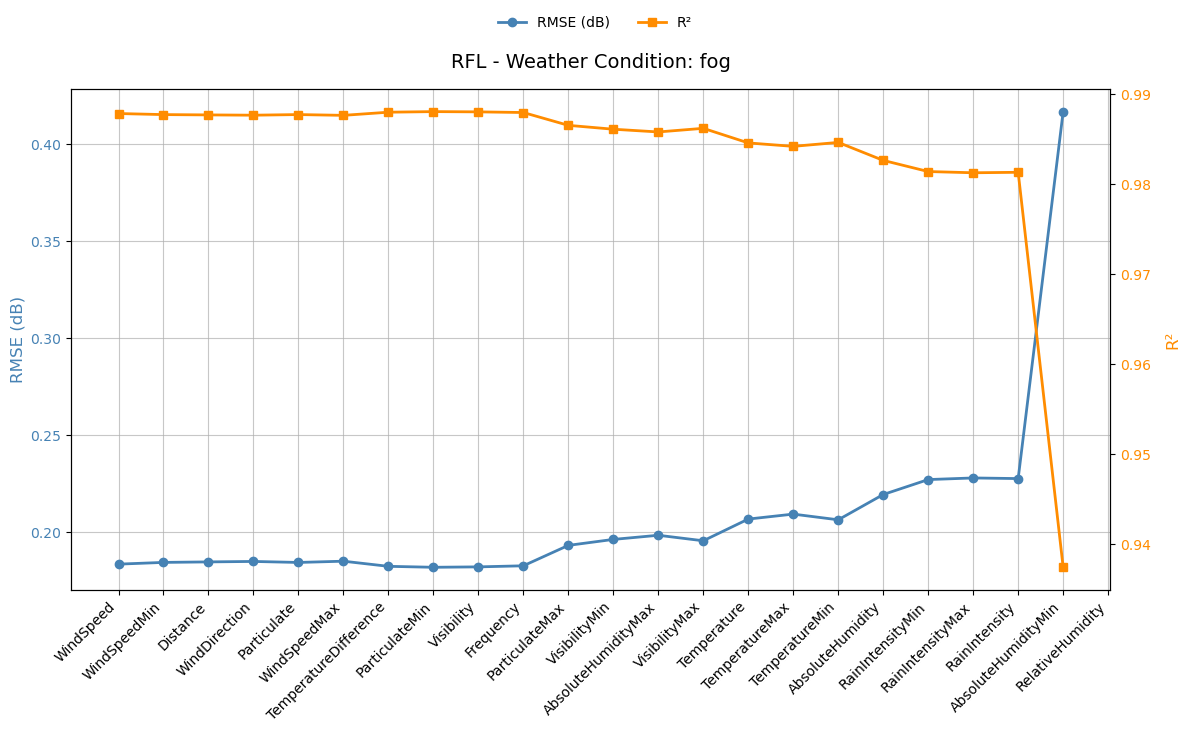

Analyzing Weather Condition: snow
FSO Analysis for Weather Condition: snow


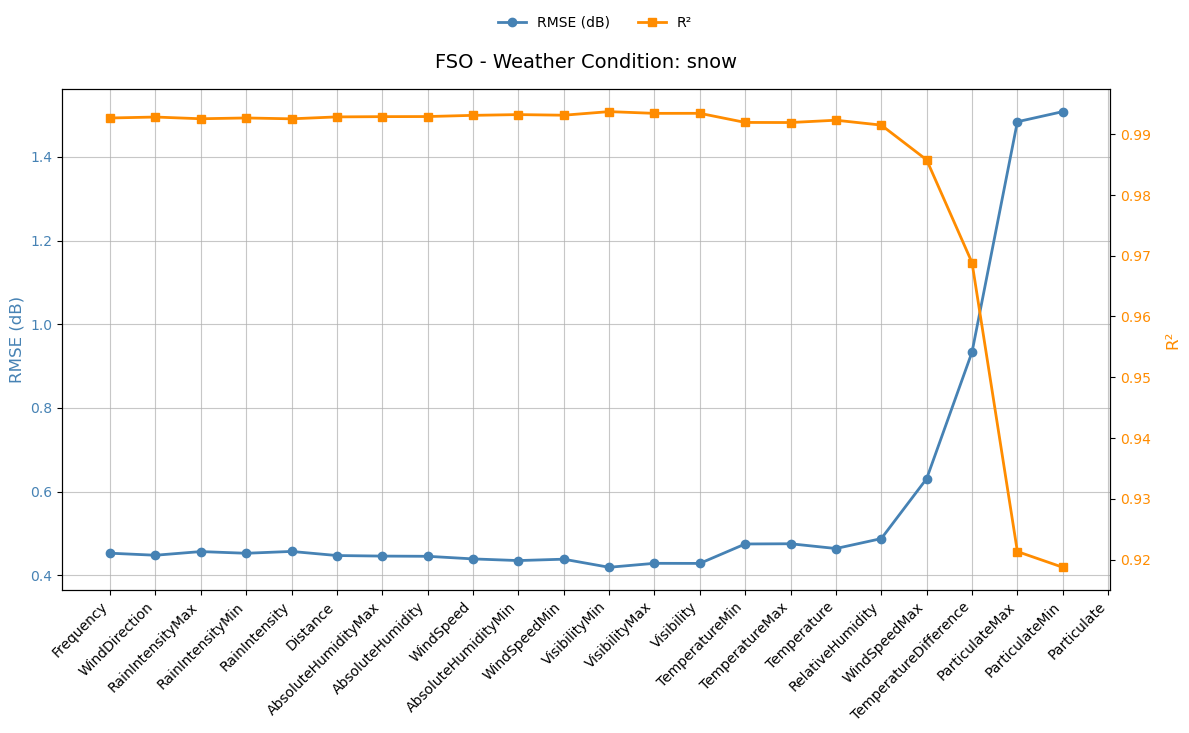

RFL Analysis for Weather Condition: snow


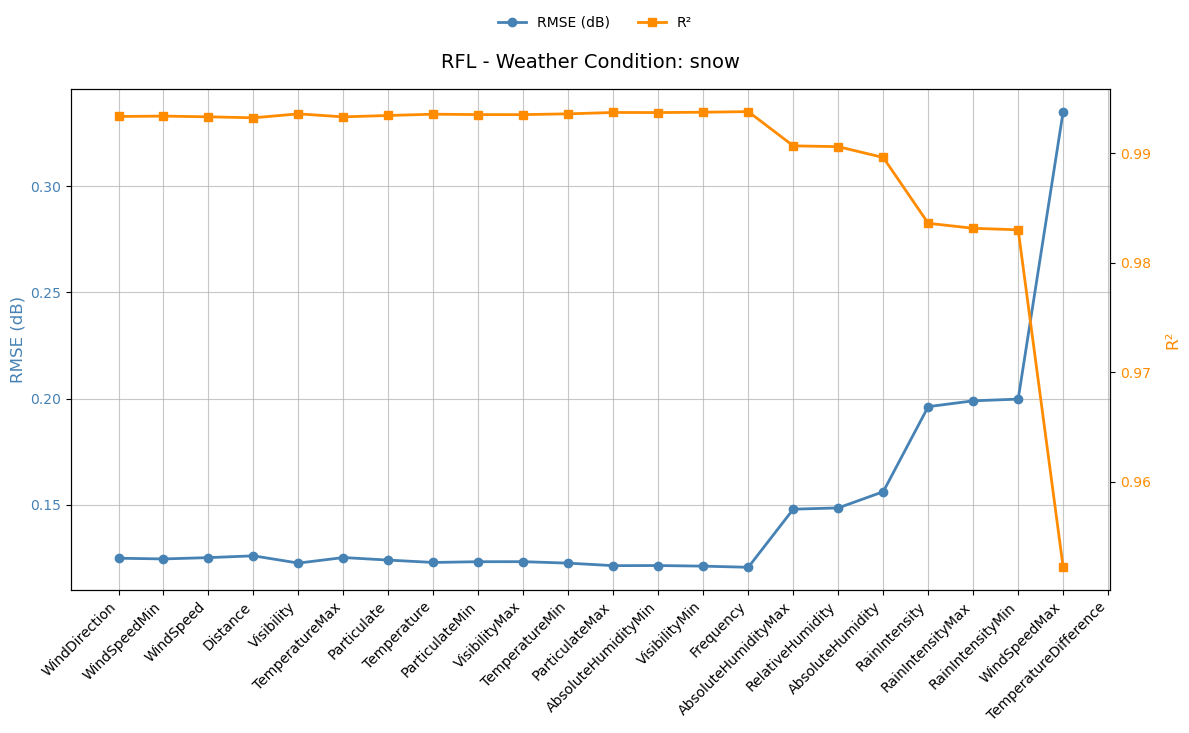

In [ ]:

weather_subsets = split_data_by_synop_code(data, synop_code_col='SYNOPCode')


results = {}
overall_features = {}


for weather, subset in weather_subsets.items():
    print(f"Analyzing Weather Condition: {weather}")
    X = subset.drop(columns=['FSO_Att', 'RFL_Att', 'Time', 'SYNOPCode'])
    y_fso = subset['FSO_Att']
    y_rfl = subset['RFL_Att']

    rf_model_fso = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
    rf_model_rfl = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

    print(f"FSO Analysis for Weather Condition: {weather}")
    sorted_features_fso, rmse_fso, r2_fso = feature_removal_analysis(X, y_fso, rf_model_fso, f"FSO - Weather Condition: {weather}")
    
    print(f"RFL Analysis for Weather Condition: {weather}")
    sorted_features_rfl, rmse_rfl, r2_rfl = feature_removal_analysis(X, y_rfl, rf_model_rfl, f"RFL - Weather Condition: {weather}")

    results[weather] = {
        'FSO': {'features': sorted_features_fso, 'rmse': rmse_fso, 'r2': r2_fso},
        'RFL': {'features': sorted_features_rfl, 'rmse': rmse_rfl, 'r2': r2_rfl}
    }


Analyzing Overall Data
FSO Analysis for Overall Data


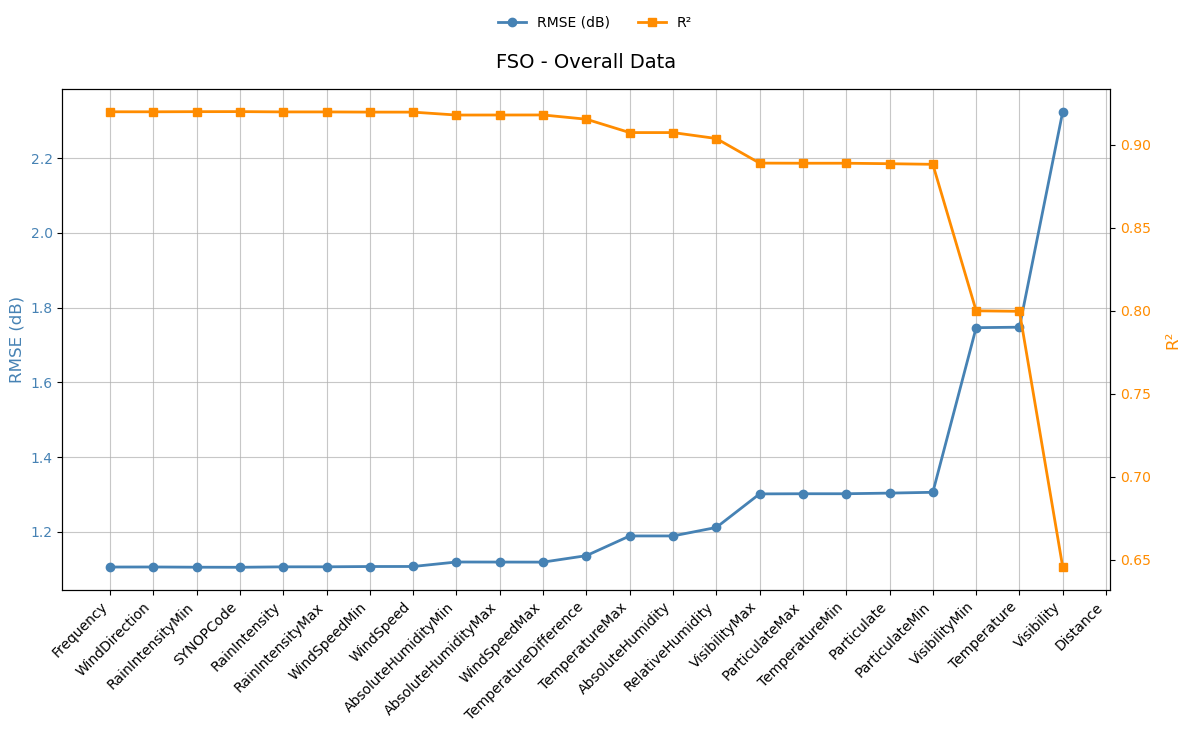

RFL Analysis for Overall Data


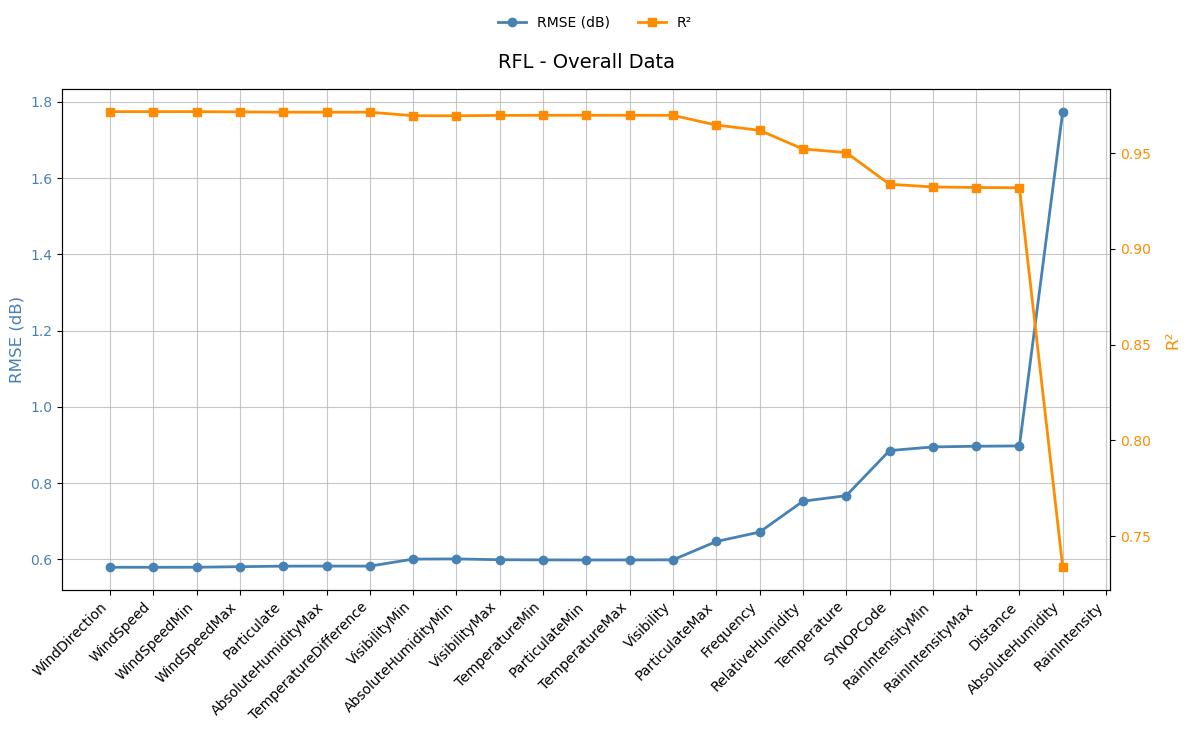

In [ ]:

print("Analyzing Overall Data")
X_overall = data.drop(columns=['FSO_Att', 'RFL_Att', 'Time'])
y_fso_overall = data['FSO_Att']
y_rfl_overall = data['RFL_Att']

rf_model_fso_overall = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_model_rfl_overall = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

print("FSO Analysis for Overall Data")
overall_features_fso, overall_rmse_fso, overall_r2_fso = feature_removal_analysis(
    X_overall, y_fso_overall, rf_model_fso_overall, "FSO - Overall Data"
)

print("RFL Analysis for Overall Data")
overall_features_rfl, overall_rmse_rfl, overall_r2_rfl = feature_removal_analysis(
    X_overall, y_rfl_overall, rf_model_rfl_overall, "RFL - Overall Data"
)

overall_features = {
    'FSO': {'features': overall_features_fso, 'rmse': overall_rmse_fso, 'r2': overall_r2_fso},
    'RFL': {'features': overall_features_rfl, 'rmse': overall_rmse_rfl, 'r2': overall_r2_rfl}
}

In [ ]:
from sklearn.model_selection import train_test_split


X_selected_fso_general = X_overall[['SYNOPCode','ParticulateMin', 'VisibilityMin', 'Temperature', 'Visibility', 'Distance']]
X_selected_rfl_general = X_overall[['SYNOPCode','Temperature', 'ParticulateMax', 'RainIntensityMin', 'RainIntensityMax', 'Distance', 'AbsoluteHumidity', 'RainIntensity']]

X_train_fso_general, X_test_fso_general, y_train_fso_general, y_test_fso_general = train_test_split(
    X_selected_fso_general, y_fso_overall, test_size=0.3, random_state=42
)
X_train_rfl_general, X_test_rfl_general, y_train_rfl_general, y_test_rfl_general = train_test_split(
    X_selected_rfl_general, y_rfl_overall, test_size=0.3, random_state=42
)


weather_specific_datasets = {}
for weather, subset in weather_subsets.items():
    print(f"Processing Weather Condition: {weather}")
    print(f"Subset shape: {subset.shape}")

 
    if weather == "clear":
        features_fso = ['AbsoluteHumidity', 'Visibility', 'TemperatureMax', 'VisibilityMin', 'VisibilityMax', 'TemperatureMin', 'Temperature', 'Distance']
        features_rfl = ['Frequency', 'Temperature', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'AbsoluteHumidity', 'Distance']
    elif weather == "rain":
        features_fso = ['Visibility', 'Temperature', 'ParticulateMin', 'ParticulateMax', 'Particulate', 'Distance']
        features_rfl = ['Distance', 'Temperature', 'RainIntensityMax', 'RainIntensityMin', 'AbsoluteHumidity', 'RainIntensity']
    elif weather == "showers":
        features_fso = ['Temperature', 'RelativeHumidity', 'VisibilityMax', 'Visibility', 'VisibilityMin', 'Distance']
        features_rfl = ['Frequency', 'Distance', 'Particulate', 'ParticulateMax', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'ParticulateMin', 'RainIntensityMax', 'RainIntensityMin', 'RainIntensity', 'AbsoluteHumidityMax', 'AbsoluteHumidity', 'AbsoluteHumidityMin']
    elif weather == "drizzle":
        features_fso = ['Temperature', 'Visibility', 'ParticulateMax', 'Distance']
        features_rfl = ['Distance', 'RainIntensity', 'RainIntensityMax', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'AbsoluteHumidity']
    elif weather == "dust storm":
        features_fso = ['Temperature', 'RelativeHumidity', 'Visibility', 'VisibilityMin', 'VisibilityMax', 'Distance']
        features_rfl = ['Temperature', 'AbsoluteHumidityMin']
    elif weather == "fog":
        features_fso = ['WindSpeedMax', 'TemperatureMin', 'Temperature', 'Distance', 'ParticulateMax', 'ParticulateMin', 'Particulate']
        features_rfl = ['RainIntensity', 'AbsoluteHumidityMin', 'RelativeHumidity']
    elif weather == "snow":
        features_fso = ['RelativeHumidity', 'WindSpeedMax', 'TemperatureDifference', 'ParticulateMax', 'ParticulateMin', 'Particulate']
        features_rfl = ['RainIntensityMin', 'WindSpeedMax', 'TemperatureDifference']
    else:
        print(f"Skipping unknown weather condition: {weather}")
        continue

    missing_fso_features = [col for col in features_fso if col not in subset.columns]
    missing_rfl_features = [col for col in features_rfl if col not in subset.columns]

    if missing_fso_features:
        print(f"Missing FSO features in {weather}: {missing_fso_features}")
        continue
    if missing_rfl_features:
        print(f"Missing RFL features in {weather}: {missing_rfl_features}")
        continue

    X_train_fso_specific, X_test_fso_specific, y_train_fso_specific, y_test_fso_specific = train_test_split(
        subset[features_fso], subset['FSO_Att'], test_size=0.3, random_state=42
    )
    X_train_rfl_specific, X_test_rfl_specific, y_train_rfl_specific, y_test_rfl_specific = train_test_split(
        subset[features_rfl], subset['RFL_Att'], test_size=0.3, random_state=42
    )

    weather_specific_datasets[weather] = {
        'FSO': {
            'X_train': X_train_fso_specific,
            'X_test': X_test_fso_specific,
            'y_train': y_train_fso_specific,
            'y_test': y_test_fso_specific,
        },
        'RFL': {
            'X_train': X_train_rfl_specific,
            'X_test': X_test_rfl_specific,
            'y_train': y_train_rfl_specific,
            'y_test': y_test_rfl_specific,
        }
    }

    print(f"Weather Condition {weather} processed successfully.\n")

print("All weather conditions processed.")


Processing Weather Condition: clear
Subset shape: (56964, 27)
Weather Condition clear processed successfully.

Processing Weather Condition: rain
Subset shape: (25018, 27)
Weather Condition rain processed successfully.

Processing Weather Condition: showers
Subset shape: (1716, 27)
Weather Condition showers processed successfully.

Processing Weather Condition: drizzle
Subset shape: (6605, 27)
Weather Condition drizzle processed successfully.

Processing Weather Condition: dust storm
Subset shape: (191, 27)
Weather Condition dust storm processed successfully.

Processing Weather Condition: fog
Subset shape: (466, 27)
Weather Condition fog processed successfully.

Processing Weather Condition: snow
Subset shape: (419, 27)
Weather Condition snow processed successfully.

All weather conditions processed.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV


def perform_random_search(X_train, y_train, model_type='FSO', scoring='neg_mean_squared_error', n_iter=5, cv=3, random_state=42):
    

    if model_type == 'FSO':
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    elif model_type == 'RFL':
        param_grid = {
            'n_estimators': [100, 150, 300],
            'max_depth': [15, 25, None],
            'min_samples_split': [2, 4, 6],
            'min_samples_leaf': [1, 3, 5]
        }
    else:
        raise ValueError("Unsupported model type. Use 'FSO' or 'RFL'.")

    model = RandomForestRegressor(random_state=random_state, n_jobs=-1)


    random_search = RandomizedSearchCV(
        model,
        param_distributions=param_grid,
        n_iter=n_iter,
        cv=cv,
        scoring=scoring,
        random_state=random_state
    )

   
    random_search.fit(X_train, y_train)

 
    return random_search.best_params_


print("Performing Random Search for General Models...")


best_params_fso_general = perform_random_search(
    X_train_fso_general,
    y_train_fso_general,
    model_type='FSO'
)
print("Best parameters for FSO_Att (General):", best_params_fso_general)


best_params_rfl_general = perform_random_search(
    X_train_rfl_general,
    y_train_rfl_general,
    model_type='RFL'
)
print("Best parameters for RFL_Att (General):", best_params_rfl_general)


print("Performing Random Search for Specific Models...")
specific_model_params = {}

for weather, datasets in weather_specific_datasets.items():
    print(f"Weather Condition: {weather}")


    best_params_fso_specific = perform_random_search(
        datasets['FSO']['X_train'],
        datasets['FSO']['y_train'],
        model_type='FSO'
    )
    print(f"  Best parameters for FSO_Att ({weather}):", best_params_fso_specific)

   
    best_params_rfl_specific = perform_random_search(
        datasets['RFL']['X_train'],
        datasets['RFL']['y_train'],
        model_type='RFL'
    )
    print(f"  Best parameters for RFL_Att ({weather}):", best_params_rfl_specific)

  
    specific_model_params[weather] = {
        'FSO': best_params_fso_specific,
        'RFL': best_params_rfl_specific
    }


print("\nGeneral Model Parameters:")
print("FSO_Att:", best_params_fso_general)
print("RFL_Att:", best_params_rfl_general)

print("\nSpecific Model Parameters:")
for weather, params in specific_model_params.items():
    print(f"Weather Condition: {weather}")
    print(f"  FSO_Att: {params['FSO']}")
    print(f"  RFL_Att: {params['RFL']}")

Performing Random Search for General Models...
Best parameters for FSO_Att (General): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best parameters for RFL_Att (General): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 15}
Performing Random Search for Specific Models...
Weather Condition: clear
  Best parameters for FSO_Att (clear): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
  Best parameters for RFL_Att (clear): {'n_estimators': 150, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 25}
Weather Condition: rain
  Best parameters for FSO_Att (rain): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
  Best parameters for RFL_Att (rain): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 15}
Weather Condition: showers
  Best parameters for FSO_Att (showers): {'n_estimators': 200, 'min_samples

In [22]:
def model_eval(model, X_test, y_test):

    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    return r2, rmse



weather_conditions = [synop_code_mapping[code] for code in X_overall['SYNOPCode'].unique() if code in synop_code_mapping]
rmse_generic_fso, r2_generic_fso = [], []
rmse_specific_fso, r2_specific_fso = [], []
rmse_generic_rfl, r2_generic_rfl = [], []
rmse_specific_rfl, r2_specific_rfl = [], []

print("Training General Models...")

generic_model_fso = RandomForestRegressor(**best_params_fso_general, random_state=42)
generic_model_rfl = RandomForestRegressor(**best_params_rfl_general, random_state=42)


generic_model_fso.fit(X_train_fso_general.drop(columns='SYNOPCode'), y_train_fso_general)
generic_model_rfl.fit(X_train_rfl_general.drop(columns='SYNOPCode'), y_train_rfl_general)
print("General models trained successfully.\n")


print("Training Specific Models...")
specific_models = {}

for weather, datasets in weather_specific_datasets.items():
    print(f"Training models for Weather Condition: {weather}")
    

    specific_model_fso = RandomForestRegressor(**specific_model_params[weather]['FSO'], random_state=42)
    specific_model_fso.fit(datasets['FSO']['X_train'], datasets['FSO']['y_train'])
    

    specific_models[weather] = {'FSO': specific_model_fso}
    print(f"  FSO Specific Model for {weather} trained successfully.")

    specific_model_rfl = RandomForestRegressor(**specific_model_params[weather]['RFL'], random_state=42)
    specific_model_rfl.fit(datasets['RFL']['X_train'], datasets['RFL']['y_train'])

    specific_models[weather]['RFL'] = specific_model_rfl
    print(f"  RFL Specific Model for {weather} trained successfully.")

print("\nAll specific models trained successfully.\n")

print("Performance by Weather Condition:\n")
for weather in weather_conditions:
    print(f"Weather Condition: {weather}")

    condition_codes = [code for code, name in synop_code_mapping.items() if name == weather]
    if not condition_codes:
        print(f"No SYNOPCode found for weather condition: {weather}")
        continue
    condition_code = condition_codes[0]

    # ----------------- FSO -----------------

    X_test_cond_fso = X_test_fso_general[X_test_fso_general['SYNOPCode'] == condition_code].drop(columns='SYNOPCode')
    y_test_cond_fso = y_test_fso_general[X_test_fso_general['SYNOPCode'] == condition_code]

    if X_test_cond_fso.empty:
        print("  FSO: No data available for general model.")
    else:

        r2_g_fso, rmse_g_fso = model_eval(generic_model_fso, X_test_cond_fso, y_test_cond_fso)
        rmse_generic_fso.append(rmse_g_fso)
        r2_generic_fso.append(r2_g_fso)
        print(f"  FSO General Model: RMSE={rmse_g_fso:.3f}, R²={r2_g_fso:.3f}")


    if weather in weather_specific_datasets:
        X_test_specific_fso = weather_specific_datasets[weather]['FSO']['X_test']
        y_test_specific_fso = weather_specific_datasets[weather]['FSO']['y_test']

        specific_model_fso = specific_models[weather]['FSO']
        r2_s_fso, rmse_s_fso = model_eval(specific_model_fso, X_test_specific_fso, y_test_specific_fso)
        rmse_specific_fso.append(rmse_s_fso)
        r2_specific_fso.append(r2_s_fso)
        print(f"  FSO Specific Model: RMSE={rmse_s_fso:.3f}, R²={r2_s_fso:.3f}")
    else:
        print(f"  FSO Specific Model: No data available for weather condition {weather}.")

    # ----------------- RFL -----------------

    X_test_cond_rfl = X_test_rfl_general[X_test_rfl_general['SYNOPCode'] == condition_code].drop(columns='SYNOPCode')
    y_test_cond_rfl = y_test_rfl_general[X_test_rfl_general['SYNOPCode'] == condition_code]

    if X_test_cond_rfl.empty:
        print("  RFL: No data available for general model.\n")
    else:

        r2_g_rfl, rmse_g_rfl = model_eval(generic_model_rfl, X_test_cond_rfl, y_test_cond_rfl)
        rmse_generic_rfl.append(rmse_g_rfl)
        r2_generic_rfl.append(r2_g_rfl)
        print(f"  RFL General Model: RMSE={rmse_g_rfl:.3f}, R²={r2_g_rfl:.3f}")


    if weather in weather_specific_datasets:
        X_test_specific_rfl = weather_specific_datasets[weather]['RFL']['X_test']
        y_test_specific_rfl = weather_specific_datasets[weather]['RFL']['y_test']


        specific_model_rfl = specific_models[weather]['RFL']
        r2_s_rfl, rmse_s_rfl = model_eval(specific_model_rfl, X_test_specific_rfl, y_test_specific_rfl)
        rmse_specific_rfl.append(rmse_s_rfl)
        r2_specific_rfl.append(r2_s_rfl)
        print(f"  RFL Specific Model: RMSE={rmse_s_rfl:.3f}, R²={r2_s_rfl:.3f}\n")
    else:
        print(f"  RFL Specific Model: No data available for weather condition {weather}.\n")



Training General Models...
General models trained successfully.

Training Specific Models...
Training models for Weather Condition: clear
  FSO Specific Model for clear trained successfully.
  RFL Specific Model for clear trained successfully.
Training models for Weather Condition: rain
  FSO Specific Model for rain trained successfully.
  RFL Specific Model for rain trained successfully.
Training models for Weather Condition: showers
  FSO Specific Model for showers trained successfully.
  RFL Specific Model for showers trained successfully.
Training models for Weather Condition: drizzle
  FSO Specific Model for drizzle trained successfully.
  RFL Specific Model for drizzle trained successfully.
Training models for Weather Condition: dust storm
  FSO Specific Model for dust storm trained successfully.
  RFL Specific Model for dust storm trained successfully.
Training models for Weather Condition: fog
  FSO Specific Model for fog trained successfully.
  RFL Specific Model for fog train

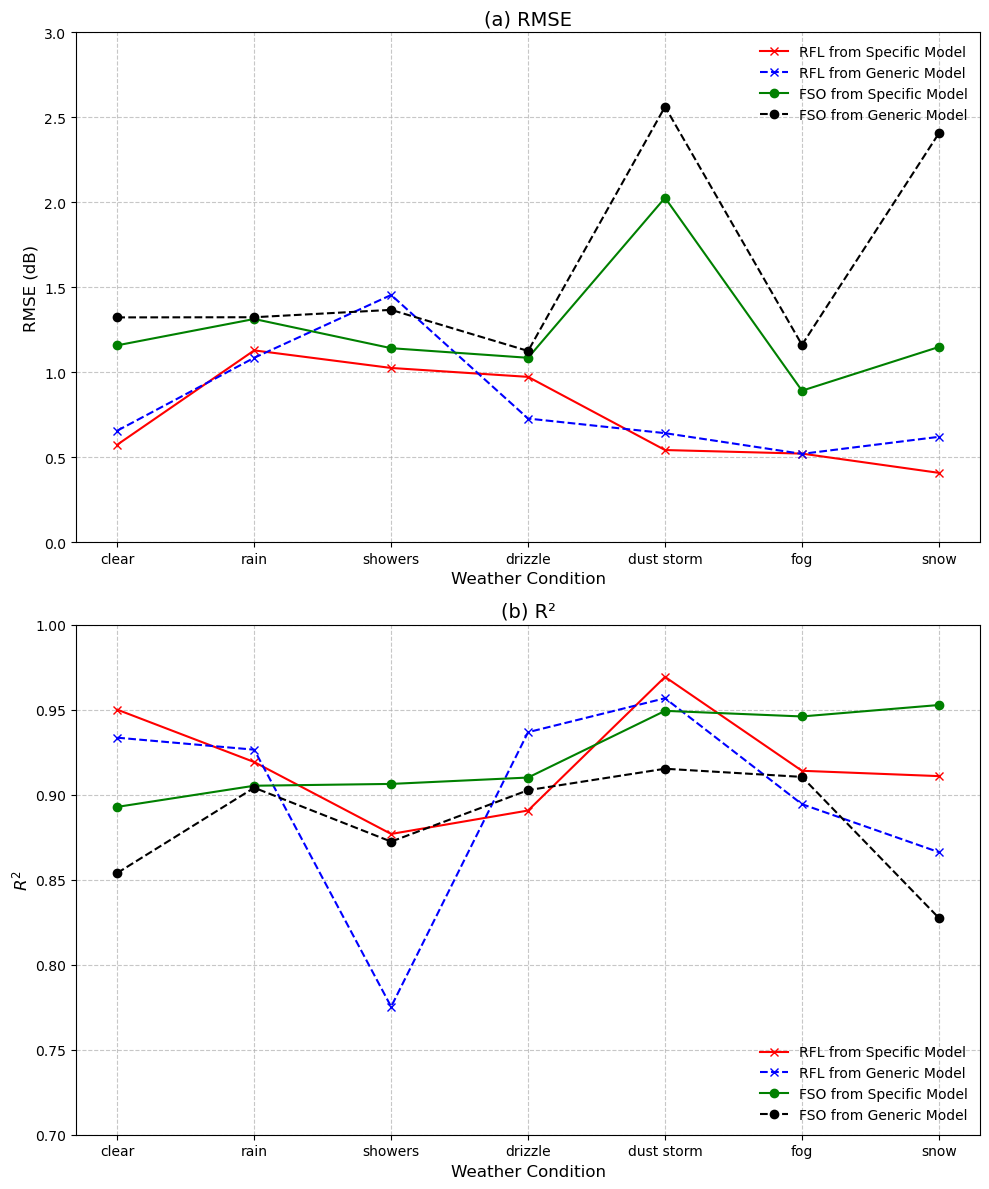

In [ ]:
def plot_combined_generic_vs_specific(weather_conditions, 
                                      rmse_generic_fso, rmse_specific_fso, 
                                      rmse_generic_rfl, rmse_specific_rfl, 
                                      r2_generic_fso, r2_specific_fso, 
                                      r2_generic_rfl, r2_specific_rfl):
    weather_labels = weather_conditions
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

    # ---- RMSE ----
    ax1.plot(weather_labels, rmse_specific_rfl, label='RFL from Specific Model', color='red', marker='x', linestyle='-')
    ax1.plot(weather_labels, rmse_generic_rfl, label='RFL from Generic Model', color='blue', marker='x', linestyle='--')
    ax1.plot(weather_labels, rmse_specific_fso, label='FSO from Specific Model', color='green', marker='o', linestyle='-')
    ax1.plot(weather_labels, rmse_generic_fso, label='FSO from Generic Model', color='black', marker='o', linestyle='--')
    ax1.set_title('(a) RMSE', fontsize=14)
    ax1.set_ylabel('RMSE (dB)', fontsize=12)
    ax1.set_xlabel('Weather Condition', fontsize=12)
    ax1.legend(fontsize=10, loc='upper right', frameon=False)
    ax1.grid(visible=True, linestyle='--', alpha=0.7)
    ax1.set_ylim(0, 3)  

    # ---- R²----
    ax2.plot(weather_labels, r2_specific_rfl, label='RFL from Specific Model', color='red', marker='x', linestyle='-')
    ax2.plot(weather_labels, r2_generic_rfl, label='RFL from Generic Model', color='blue', marker='x', linestyle='--')
    ax2.plot(weather_labels, r2_specific_fso, label='FSO from Specific Model', color='green', marker='o', linestyle='-')
    ax2.plot(weather_labels, r2_generic_fso, label='FSO from Generic Model', color='black', marker='o', linestyle='--')
    ax2.set_title('(b) R²', fontsize=14)
    ax2.set_ylabel('$R^2$', fontsize=12)
    ax2.set_xlabel('Weather Condition', fontsize=12)
    ax2.legend(fontsize=10, loc='lower right', frameon=False)
    ax2.grid(visible=True, linestyle='--', alpha=0.7)
    ax2.set_ylim(0.7, 1) 


    plt.tight_layout()
    plt.show()


plot_combined_generic_vs_specific(
    weather_conditions, rmse_generic_fso, rmse_specific_fso,
    rmse_generic_rfl, rmse_specific_rfl,
    r2_generic_fso, r2_specific_fso,
    r2_generic_rfl, r2_specific_rfl
)